<a href="https://colab.research.google.com/github/Chanura04/ML-Coursework/blob/main/20240955.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [61]:
!pip install keras-tuner 

In [62]:
import pandas as pd
# from google.colab import drive
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import keras_tuner as kt
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow.keras import layers, regularizers, optimizers, callbacks, models
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (
    StratifiedKFold, RandomizedSearchCV, GridSearchCV, cross_val_score
)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)
import tensorflow as tf

SEED = 42
tf.random.set_seed(SEED)

## Load the dataset

In [63]:
url_x = "https://raw.githubusercontent.com/Chanura04/ML-Coursework/main/dataset/processed/set_02/X.csv"
url_y = "https://raw.githubusercontent.com/Chanura04/ML-Coursework/main/dataset/processed/set_02/y_data.csv"

## Check dataset behaviour

In [64]:
X=pd.read_csv(url_x)
y=pd.read_csv(url_y)
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,-1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,-1,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [65]:
X.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [66]:
X.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharge', 'IsNewCustomer',
       'Contract_Monthly', 'HasFiber', 'IsHighCharge', 'Monthly_Tenure_Ratio',
       'Total_Monthly_Ratio', 'TotalServices', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [67]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [68]:
X.shape

(7043, 33)

In [69]:
y.shape

(7043, 1)

In [70]:
cols=[ 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

if set(cols) == set(X.columns):
    print("All columns are present.")
else:
    missing = set(cols) - set(X.columns)
    extra = set(X.columns) - set(cols)
    if missing:
        print("Missing columns:", missing)
    if extra:
        print("Extra columns:", extra)

Extra columns: {'Contract_Monthly', 'Monthly_Tenure_Ratio', 'IsNewCustomer', 'HasFiber', 'Contract_Month-to-month', 'AvgMonthlyCharge', 'TotalServices', 'Total_Monthly_Ratio', 'IsHighCharge', 'PaymentMethod_Bank transfer (automatic)', 'InternetService_DSL'}


### Split Data into Training, Validation, and Test Sets

In [71]:
# X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_temp, y_train, y_temp= train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test= train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (4930, 33)
Shape of y_train: (4930, 1)
Shape of X_val: (1056, 33)
Shape of y_val: (1056, 1)
Shape of X_test: (1057, 33)
Shape of y_test: (1057, 1)


In [72]:
np.sum(y_val==1)

c:\Users\chanu\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Churn    280
dtype: int64

In [73]:
np.sum(y_val==0)

Churn    776
dtype: int64

In [74]:
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)


In [75]:
# Initialize the scaler
scaler = StandardScaler()

# FIT AND TRANSFORM the training data 
X_train = scaler.fit_transform(X_train)

# TRANSFORM the test data 
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [76]:
X_train[0]

array([-0.43814715, -0.96295739, -0.65086184, -1.11472828,  0.33445908,
       -0.4980904 , -0.10182582, -0.17864867, -0.17914794, -0.10933053,
        1.08149216, -0.23031519, -1.20529512,  0.50428615, -0.83650447,
        0.15846124,  1.94586941,  0.90731739,  1.12453737,  1.2628289 ,
        0.86704288, -1.11758834, -0.35455473, -0.72059725,  1.12453737,
       -0.52587133,  0.90731739, -0.51517027, -0.5647009 , -0.53152442,
       -0.52555704,  1.40735673, -0.54312331])

In [77]:
y_train = y_train.squeeze()    
y_val   = y_val.squeeze()
y_test  = y_test.squeeze()

Text(0.5, 1.0, 'Count Plot for Churn')

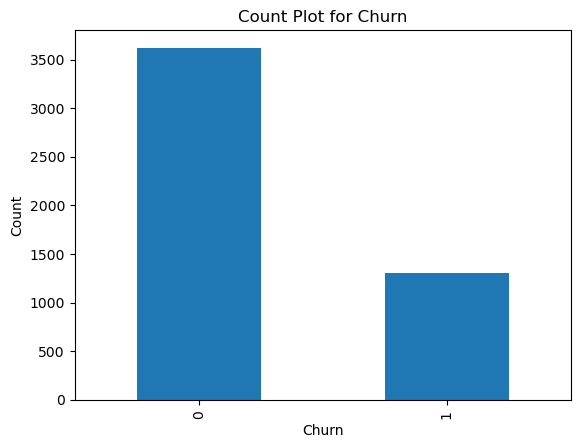

In [78]:
count=y_train.value_counts()
count.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count Plot for Churn')

Text(0.5, 1.0, 'Count Plot for Churn')

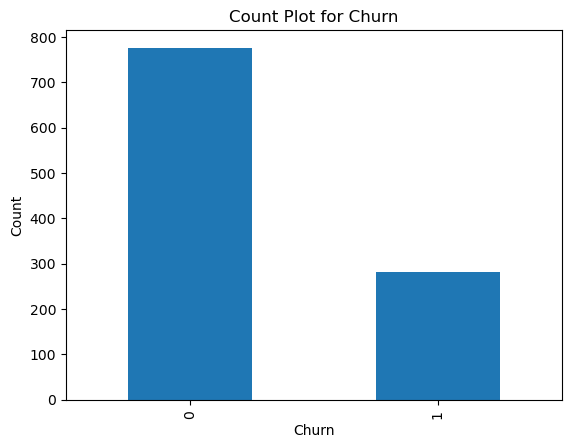

In [79]:
count=y_test.value_counts()
count.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count Plot for Churn')

In [80]:
def plot_history(history):
    # Loss
    plt.figure(figsize=(18,6))
    plt.subplot(1,3,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Loss Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Binary Crossentropy")
    plt.legend()


    # Accuracy
    plt.subplot(1,3,2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title("Accuracy Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()


    # AUC
    plt.subplot(1,3,3)
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.title("AUC Curve")
    plt.xlabel("Epochs")
    plt.ylabel("AUC Score")
    plt.legend()
    plt.show()





## Train Neural Network

#### Experiment 01

In [81]:
input_dim=X_train.shape[1]
input_dim

33

In [82]:


# # 1. Load raw data
# df = pd.read_csv("https://raw.githubusercontent.com/Chanura04/ML-Coursework/main/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# # 2. Fix TotalCharges
# df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# df['TotalCharges'].fillna(df['tenure'] * df['MonthlyCharges'], inplace=True)

# # 3. Feature Engineering
# df['AvgMonthlyCharge']     = df['TotalCharges'] / (df['tenure'] + 1)
# df['IsNewCustomer']        = (df['tenure'] <= 6).astype(int)
# df['Contract_Monthly']     = (df['Contract'] == 'Month-to-month').astype(int)
# df['HasFiber']             = (df['InternetService'] == 'Fiber optic').astype(int)



# df['IsHighCharge'] = (df['MonthlyCharges'] >= 80).astype(int)


# # Ratio features
# df['Monthly_Tenure_Ratio'] = df['MonthlyCharges'] / (df['tenure'] + 1)
# df['Total_Monthly_Ratio']  = df['TotalCharges'] / (df['MonthlyCharges'] + 1)

# # 4. Proper encoding
# # Binary Yes/No → 1/0
# binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
# for col in binary_cols:
#     df[col] = df[col].map({'Yes': 1, 'No': 0})

# # MultipleLines
# df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': -1})

# # "No internet service" → -1 (keep the information!)
# no_internet_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
#                     'TechSupport', 'StreamingTV', 'StreamingMovies']
# for col in no_internet_cols:
#     df[col] = df[col].map({'Yes': 1, 'No': 0, 'No internet service': -1})

# # TotalServices – CORRECTED VERSION
# addon_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
#               'TechSupport', 'StreamingTV', 'StreamingMovies']
# df['TotalAddons'] = (df[addon_cols] == 1).sum(axis=1)  # only count actual "Yes"
# df['TotalServices'] = (
#     (df['PhoneService'] == 1).astype(int) +
#     (df['InternetService'] != 'No').astype(int) +
#     df['TotalAddons']
# )
# df.drop('TotalAddons', axis=1, inplace=True)

# # 5. One-hot encoding
# df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=False,dtype=int)


# # 6. Target
# df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# # 7. Drop useless columns
# df.drop(['customerID', 'gender'], axis=1, inplace=True)

# # 8. Split before scaling
# X = df.drop('Churn', axis=1)
# y = df['Churn']

# # 9. Scale only continuous columns
# scaler = StandardScaler()
# num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges',
#             'AvgMonthlyCharge', 'Monthly_Tenure_Ratio', 'Total_Monthly_Ratio']

# X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
# X_val[num_cols]   = scaler.transform(X_val[num_cols])
# X_test[num_cols]  = scaler.transform(X_test[num_cols])

# # To numpy


# print("Final shape:", X_train.shape)  # → usually (4922, 34) or similar

In [83]:
# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, stratify=y_train_val, random_state=42)


# X_train = X_train.values.astype('float32')
# X_val   = X_val.values.astype('float32')
# X_test  = X_test.values.astype('float32')
# y_train = y_train.squeeze()    
# y_val   = y_val.squeeze()
# y_test  = y_test.squeeze()

In [84]:

print("Final shape:", X_train.shape)

Final shape: (4930, 33)


In [85]:
len(X.columns)

33

In [86]:
# Optional: suppress the warning
import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
set_seed=42
os.environ['PYTHONHASHSEED'] = str(set_seed)

def create_final_model(input_dim):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),

        # layers.Dense(512, activation='relu'),
        # layers.BatchNormalization(),
        # layers.Dropout(0.6),
        
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),

        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3
                       ),
        
        # layers.Dense(96, activation='relu'),
        # layers.BatchNormalization(),
        # layers.Dropout(0.3),
        
        # layers.Dense(64, activation='relu'),
        # layers.BatchNormalization(),
        # layers.Dropout(0.2),
        
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.2),
        # layers.BatchNormalization(),

        
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Build model
input_dim = X_train.shape[1]  # 34
model = create_final_model(input_dim)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# Callbacks
callbacks_list = [
    callbacks.EarlyStopping(monitor='val_auc', patience=15, restore_best_weights=True, mode='max'),
    callbacks.ReduceLROnPlateau(monitor='val_auc', factor=0.5, patience=8, min_lr=1e-7),
    callbacks.ModelCheckpoint('best_churn_model_2.h5', monitor='val_auc', save_best_only=True, mode='max')
]

# Class weights (important! churn is imbalanced)
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print("Class weights:", class_weight_dict)

# TRAIN
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=1024,
    callbacks=callbacks_list,
    class_weight=class_weight_dict,
    verbose=2
)

Class weights: {0: np.float64(0.680563224737714), 1: np.float64(1.8845565749235473)}
Epoch 1/200


5/5 - 2s - 396ms/step - accuracy: 0.6325 - auc: 0.5840 - loss: 0.7253 - precision: 0.3288 - recall: 0.3700 - val_accuracy: 0.5473 - val_auc: 0.5588 - val_loss: 0.6885 - val_precision: 0.3004 - val_recall: 0.5321 - learning_rate: 0.0010
Epoch 2/200


5/5 - 0s - 21ms/step - accuracy: 0.6604 - auc: 0.6633 - loss: 0.6661 - precision: 0.3904 - recall: 0.4985 - val_accuracy: 0.6695 - val_auc: 0.7228 - val_loss: 0.6551 - val_precision: 0.4148 - val_recall: 0.6000 - learning_rate: 0.0010
Epoch 3/200


5/5 - 0s - 19ms/step - accuracy: 0.6913 - auc: 0.7282 - loss: 0.6131 - precision: 0.4398 - recall: 0.5979 - val_accuracy: 0.7055 - val_auc: 0.7809 - val_loss: 0.6267 - val_precision: 0.4630 - val_recall: 0.6929 - learning_rate: 0.0010
Epoch 4/200


5/5 - 0s - 20ms/step - accuracy: 0.7041 - auc: 0.7555 - loss: 0.5901 - precision: 0.4607 - recall: 0.6774 - val_accuracy: 0.7320 - val_auc: 0.8023 - val_loss: 0.6029 - val_precision: 0.4964 - val_recall: 0.7429 - learning_rate: 0.0010
Epoch 5/200


5/5 - 0s - 19ms/step - accuracy: 0.7093 - auc: 0.7739 - loss: 0.5724 - precision: 0.4688 - recall: 0.7179 - val_accuracy: 0.7367 - val_auc: 0.8149 - val_loss: 0.5834 - val_precision: 0.5023 - val_recall: 0.7821 - learning_rate: 0.0010
Epoch 6/200


5/5 - 0s - 23ms/step - accuracy: 0.7176 - auc: 0.7916 - loss: 0.5552 - precision: 0.4796 - recall: 0.7546 - val_accuracy: 0.7367 - val_auc: 0.8224 - val_loss: 0.5676 - val_precision: 0.5022 - val_recall: 0.8071 - learning_rate: 0.0010
Epoch 7/200


5/5 - 0s - 23ms/step - accuracy: 0.7172 - auc: 0.8036 - loss: 0.5384 - precision: 0.4796 - recall: 0.7729 - val_accuracy: 0.7348 - val_auc: 0.8270 - val_loss: 0.5547 - val_precision: 0.5000 - val_recall: 0.8107 - learning_rate: 0.0010
Epoch 8/200


5/5 - 0s - 30ms/step - accuracy: 0.7164 - auc: 0.8052 - loss: 0.5378 - precision: 0.4787 - recall: 0.7714 - val_accuracy: 0.7339 - val_auc: 0.8301 - val_loss: 0.5443 - val_precision: 0.4989 - val_recall: 0.8107 - learning_rate: 0.0010
Epoch 9/200


5/5 - 0s - 22ms/step - accuracy: 0.7178 - auc: 0.8087 - loss: 0.5314 - precision: 0.4805 - recall: 0.7798 - val_accuracy: 0.7339 - val_auc: 0.8325 - val_loss: 0.5357 - val_precision: 0.4989 - val_recall: 0.8143 - learning_rate: 0.0010
Epoch 10/200


5/5 - 0s - 24ms/step - accuracy: 0.7247 - auc: 0.8097 - loss: 0.5348 - precision: 0.4886 - recall: 0.7997 - val_accuracy: 0.7367 - val_auc: 0.8344 - val_loss: 0.5285 - val_precision: 0.5022 - val_recall: 0.8214 - learning_rate: 0.0010
Epoch 11/200


5/5 - 0s - 22ms/step - accuracy: 0.7294 - auc: 0.8195 - loss: 0.5223 - precision: 0.4938 - recall: 0.7928 - val_accuracy: 0.7396 - val_auc: 0.8362 - val_loss: 0.5218 - val_precision: 0.5055 - val_recall: 0.8214 - learning_rate: 0.0010
Epoch 12/200


5/5 - 0s - 24ms/step - accuracy: 0.7245 - auc: 0.8154 - loss: 0.5270 - precision: 0.4882 - recall: 0.7920 - val_accuracy: 0.7405 - val_auc: 0.8374 - val_loss: 0.5163 - val_precision: 0.5066 - val_recall: 0.8179 - learning_rate: 0.0010
Epoch 13/200


5/5 - 0s - 21ms/step - accuracy: 0.7247 - auc: 0.8127 - loss: 0.5350 - precision: 0.4883 - recall: 0.7836 - val_accuracy: 0.7434 - val_auc: 0.8391 - val_loss: 0.5133 - val_precision: 0.5100 - val_recall: 0.8214 - learning_rate: 0.0010
Epoch 14/200


5/5 - 0s - 23ms/step - accuracy: 0.7359 - auc: 0.8220 - loss: 0.5180 - precision: 0.5014 - recall: 0.7966 - val_accuracy: 0.7453 - val_auc: 0.8402 - val_loss: 0.5108 - val_precision: 0.5122 - val_recall: 0.8250 - learning_rate: 0.0010
Epoch 15/200


5/5 - 0s - 21ms/step - accuracy: 0.7323 - auc: 0.8233 - loss: 0.5204 - precision: 0.4971 - recall: 0.7943 - val_accuracy: 0.7443 - val_auc: 0.8412 - val_loss: 0.5091 - val_precision: 0.5111 - val_recall: 0.8214 - learning_rate: 0.0010
Epoch 16/200


5/5 - 0s - 25ms/step - accuracy: 0.7347 - auc: 0.8222 - loss: 0.5200 - precision: 0.5000 - recall: 0.7936 - val_accuracy: 0.7443 - val_auc: 0.8417 - val_loss: 0.5081 - val_precision: 0.5111 - val_recall: 0.8214 - learning_rate: 0.0010
Epoch 17/200


5/5 - 0s - 22ms/step - accuracy: 0.7327 - auc: 0.8260 - loss: 0.5126 - precision: 0.4976 - recall: 0.8035 - val_accuracy: 0.7443 - val_auc: 0.8425 - val_loss: 0.5075 - val_precision: 0.5111 - val_recall: 0.8250 - learning_rate: 0.0010
Epoch 18/200


5/5 - 0s - 23ms/step - accuracy: 0.7361 - auc: 0.8235 - loss: 0.5173 - precision: 0.5017 - recall: 0.8020 - val_accuracy: 0.7453 - val_auc: 0.8429 - val_loss: 0.5063 - val_precision: 0.5122 - val_recall: 0.8250 - learning_rate: 0.0010
Epoch 19/200


5/5 - 0s - 27ms/step - accuracy: 0.7389 - auc: 0.8281 - loss: 0.5114 - precision: 0.5051 - recall: 0.8005 - val_accuracy: 0.7443 - val_auc: 0.8438 - val_loss: 0.5055 - val_precision: 0.5111 - val_recall: 0.8250 - learning_rate: 0.0010
Epoch 20/200


5/5 - 0s - 31ms/step - accuracy: 0.7410 - auc: 0.8296 - loss: 0.5088 - precision: 0.5075 - recall: 0.8066 - val_accuracy: 0.7415 - val_auc: 0.8440 - val_loss: 0.5043 - val_precision: 0.5078 - val_recall: 0.8143 - learning_rate: 0.0010
Epoch 21/200


5/5 - 0s - 26ms/step - accuracy: 0.7355 - auc: 0.8265 - loss: 0.5106 - precision: 0.5010 - recall: 0.7943 - val_accuracy: 0.7424 - val_auc: 0.8441 - val_loss: 0.5030 - val_precision: 0.5089 - val_recall: 0.8143 - learning_rate: 0.0010
Epoch 22/200


5/5 - 0s - 22ms/step - accuracy: 0.7343 - auc: 0.8295 - loss: 0.5101 - precision: 0.4995 - recall: 0.8005 - val_accuracy: 0.7396 - val_auc: 0.8444 - val_loss: 0.5024 - val_precision: 0.5055 - val_recall: 0.8143 - learning_rate: 0.0010
Epoch 23/200


5/5 - 0s - 25ms/step - accuracy: 0.7353 - auc: 0.8319 - loss: 0.5056 - precision: 0.5007 - recall: 0.8012 - val_accuracy: 0.7396 - val_auc: 0.8448 - val_loss: 0.5015 - val_precision: 0.5055 - val_recall: 0.8143 - learning_rate: 0.0010
Epoch 24/200


5/5 - 0s - 25ms/step - accuracy: 0.7396 - auc: 0.8315 - loss: 0.5076 - precision: 0.5058 - recall: 0.8050 - val_accuracy: 0.7405 - val_auc: 0.8450 - val_loss: 0.5007 - val_precision: 0.5067 - val_recall: 0.8143 - learning_rate: 0.0010
Epoch 25/200


5/5 - 0s - 24ms/step - accuracy: 0.7381 - auc: 0.8331 - loss: 0.5044 - precision: 0.5041 - recall: 0.8050 - val_accuracy: 0.7434 - val_auc: 0.8454 - val_loss: 0.4999 - val_precision: 0.5101 - val_recall: 0.8143 - learning_rate: 0.0010
Epoch 26/200


5/5 - 0s - 23ms/step - accuracy: 0.7436 - auc: 0.8358 - loss: 0.4994 - precision: 0.5106 - recall: 0.8081 - val_accuracy: 0.7424 - val_auc: 0.8458 - val_loss: 0.4990 - val_precision: 0.5090 - val_recall: 0.8107 - learning_rate: 0.0010
Epoch 27/200


5/5 - 0s - 27ms/step - accuracy: 0.7371 - auc: 0.8321 - loss: 0.5088 - precision: 0.5028 - recall: 0.8096 - val_accuracy: 0.7434 - val_auc: 0.8464 - val_loss: 0.4991 - val_precision: 0.5101 - val_recall: 0.8107 - learning_rate: 0.0010
Epoch 28/200
5/5 - 0s - 19ms/step - accuracy: 0.7365 - auc: 0.8335 - loss: 0.5032 - precision: 0.5022 - recall: 0.8020 - val_accuracy: 0.7434 - val_auc: 0.8464 - val_loss: 0.4992 - val_precision: 0.5101 - val_recall: 0.8107 - learning_rate: 0.0010
Epoch 29/200


5/5 - 0s - 26ms/step - accuracy: 0.7438 - auc: 0.8333 - loss: 0.5077 - precision: 0.5108 - recall: 0.8135 - val_accuracy: 0.7443 - val_auc: 0.8465 - val_loss: 0.4997 - val_precision: 0.5112 - val_recall: 0.8179 - learning_rate: 0.0010
Epoch 30/200


5/5 - 0s - 26ms/step - accuracy: 0.7430 - auc: 0.8347 - loss: 0.5023 - precision: 0.5099 - recall: 0.8043 - val_accuracy: 0.7415 - val_auc: 0.8466 - val_loss: 0.5000 - val_precision: 0.5077 - val_recall: 0.8286 - learning_rate: 0.0010
Epoch 31/200


5/5 - 0s - 30ms/step - accuracy: 0.7404 - auc: 0.8388 - loss: 0.4963 - precision: 0.5068 - recall: 0.8020 - val_accuracy: 0.7434 - val_auc: 0.8467 - val_loss: 0.5001 - val_precision: 0.5098 - val_recall: 0.8357 - learning_rate: 0.0010
Epoch 32/200
5/5 - 0s - 19ms/step - accuracy: 0.7385 - auc: 0.8342 - loss: 0.5060 - precision: 0.5046 - recall: 0.8012 - val_accuracy: 0.7443 - val_auc: 0.8465 - val_loss: 0.5003 - val_precision: 0.5109 - val_recall: 0.8393 - learning_rate: 0.0010
Epoch 33/200
5/5 - 0s - 21ms/step - accuracy: 0.7422 - auc: 0.8378 - loss: 0.5006 - precision: 0.5089 - recall: 0.8096 - val_accuracy: 0.7443 - val_auc: 0.8465 - val_loss: 0.5010 - val_precision: 0.5109 - val_recall: 0.8393 - learning_rate: 0.0010
Epoch 34/200
5/5 - 0s - 19ms/step - accuracy: 0.7402 - auc: 0.8378 - loss: 0.4972 - precision: 0.5065 - recall: 0.8005 - val_accuracy: 0.7405 - val_auc: 0.8466 - val_loss: 0.5016 - val_precision: 0.5066 - val_recall: 0.8286 - learning_rate: 0.0010
Epoch 35/200
5/5 - 0s

5/5 - 0s - 23ms/step - accuracy: 0.7444 - auc: 0.8399 - loss: 0.4957 - precision: 0.5115 - recall: 0.8135 - val_accuracy: 0.7434 - val_auc: 0.8468 - val_loss: 0.5010 - val_precision: 0.5099 - val_recall: 0.8286 - learning_rate: 0.0010
Epoch 39/200
5/5 - 0s - 19ms/step - accuracy: 0.7442 - auc: 0.8372 - loss: 0.4990 - precision: 0.5113 - recall: 0.8142 - val_accuracy: 0.7434 - val_auc: 0.8468 - val_loss: 0.5008 - val_precision: 0.5099 - val_recall: 0.8286 - learning_rate: 0.0010
Epoch 40/200


5/5 - 0s - 22ms/step - accuracy: 0.7529 - auc: 0.8442 - loss: 0.4902 - precision: 0.5220 - recall: 0.8150 - val_accuracy: 0.7434 - val_auc: 0.8468 - val_loss: 0.5003 - val_precision: 0.5099 - val_recall: 0.8250 - learning_rate: 0.0010
Epoch 41/200


5/5 - 0s - 23ms/step - accuracy: 0.7381 - auc: 0.8375 - loss: 0.5002 - precision: 0.5041 - recall: 0.7974 - val_accuracy: 0.7443 - val_auc: 0.8469 - val_loss: 0.5010 - val_precision: 0.5110 - val_recall: 0.8286 - learning_rate: 0.0010
Epoch 42/200
5/5 - 0s - 19ms/step - accuracy: 0.7467 - auc: 0.8428 - loss: 0.4928 - precision: 0.5143 - recall: 0.8119 - val_accuracy: 0.7434 - val_auc: 0.8468 - val_loss: 0.5015 - val_precision: 0.5099 - val_recall: 0.8250 - learning_rate: 0.0010
Epoch 43/200


5/5 - 0s - 24ms/step - accuracy: 0.7469 - auc: 0.8422 - loss: 0.4922 - precision: 0.5145 - recall: 0.8119 - val_accuracy: 0.7443 - val_auc: 0.8469 - val_loss: 0.5014 - val_precision: 0.5110 - val_recall: 0.8286 - learning_rate: 0.0010
Epoch 44/200
5/5 - 0s - 16ms/step - accuracy: 0.7444 - auc: 0.8381 - loss: 0.5010 - precision: 0.5115 - recall: 0.8127 - val_accuracy: 0.7405 - val_auc: 0.8468 - val_loss: 0.5013 - val_precision: 0.5066 - val_recall: 0.8250 - learning_rate: 0.0010
Epoch 45/200
5/5 - 0s - 19ms/step - accuracy: 0.7501 - auc: 0.8388 - loss: 0.4968 - precision: 0.5187 - recall: 0.8043 - val_accuracy: 0.7405 - val_auc: 0.8465 - val_loss: 0.5010 - val_precision: 0.5066 - val_recall: 0.8250 - learning_rate: 0.0010
Epoch 46/200
5/5 - 0s - 16ms/step - accuracy: 0.7495 - auc: 0.8415 - loss: 0.4935 - precision: 0.5180 - recall: 0.8020 - val_accuracy: 0.7424 - val_auc: 0.8466 - val_loss: 0.5009 - val_precision: 0.5088 - val_recall: 0.8286 - learning_rate: 0.0010
Epoch 47/200
5/5 - 0s

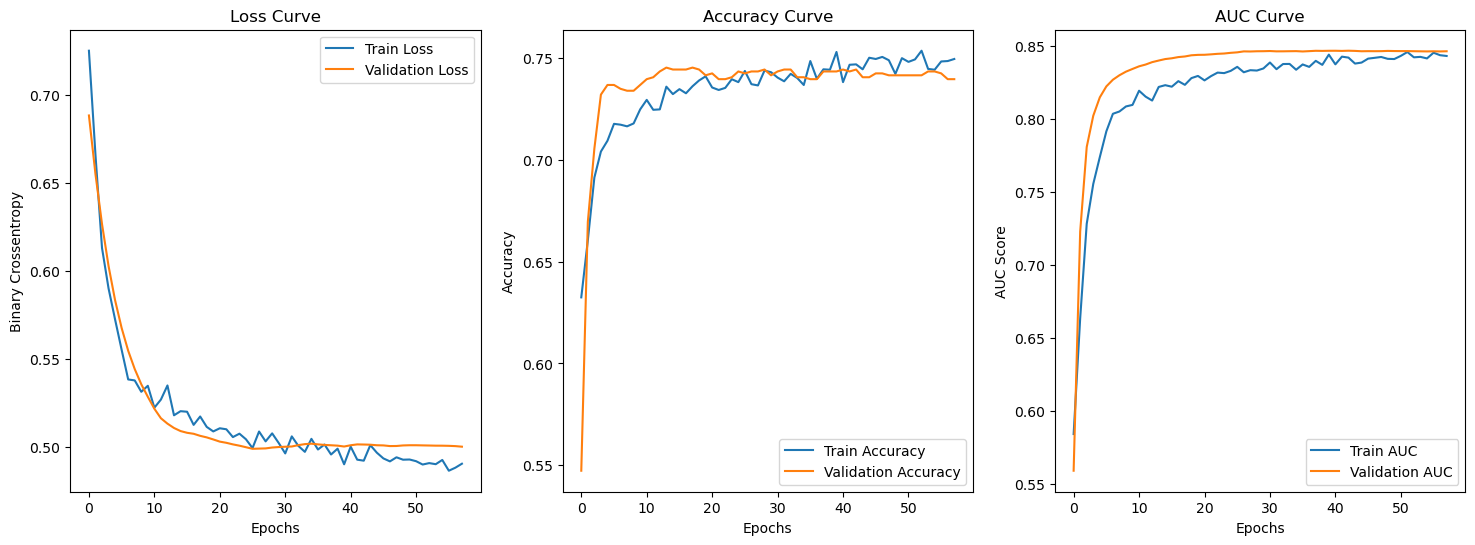

In [87]:
plot_history(history)

In [94]:
best_model_2 = keras.models.load_model('best_churn_model_2.h5')
test_results = best_model_2.evaluate(X_test, y_test, verbose=0)

print(f"Test AUC: {roc_auc_score(y_test, best_model_2.predict(X_test)):.4f}")
print(f"Test Accuracy: {test_results[2]:.4f}")
print(f"Test Precision: {precision_score(y_test, (best_model_2.predict(X_test) >= 0.64).astype(int)):.4f}")
print(f"Test Recall: {recall_score(y_test, (best_model_2.predict(X_test) >= 0.64).astype(int)):.4f}")

print("Classification Report:")
print(classification_report(y_test, (best_model_2.predict(X_test) >= 0.64).astype(int)))

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test AUC: 0.8463
Test Accuracy: 0.8464
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Test Precision: 0.6071
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step
Test Recall: 0.6050
Classification Report:
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       776
           1       0.61      0.60      0.61       281

    accuracy                           0.79      1057
   macro avg       0.73      0.73      0.73      1057
weighted avg       0.79      0.79      0.79      1057



34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


<Axes: >

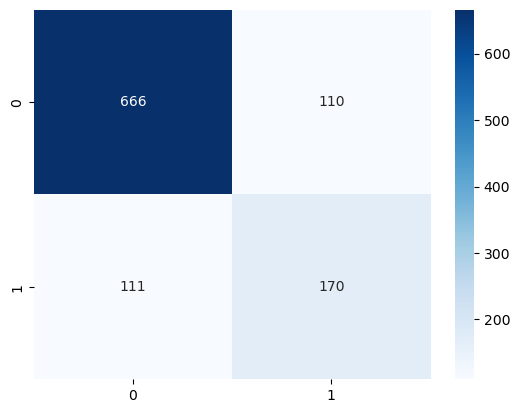

In [89]:
cm=confusion_matrix(y_test, (best_model_2.predict(X_test) >= 0.64).astype(int))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


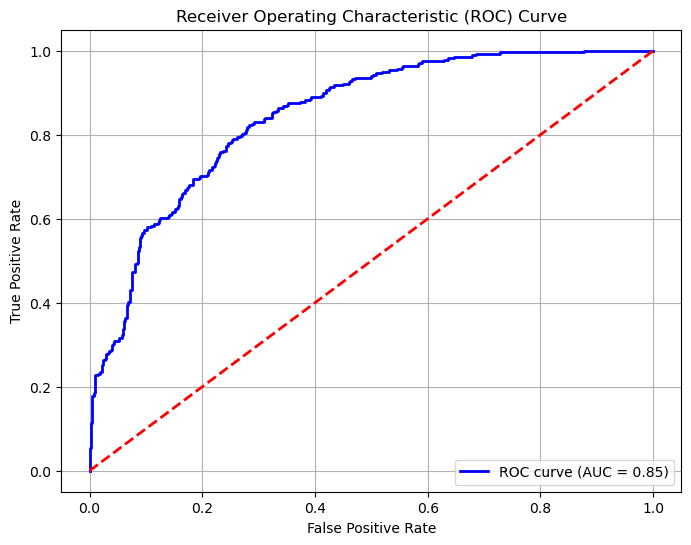

In [90]:
y_pred_prob = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)


plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()